# ETL

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/AccidentesAviones.csv')

In [3]:
df.head(5)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [4]:
df.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [5]:
df.shape

(5008, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [7]:
df.isnull().sum()

Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     1
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

In [8]:
df.replace('?', np.nan, inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0                   0
fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      763
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

In [10]:
# Completamos los valores faltantes de la columna summary 
df['summary'].fillna("Crashed under unknown circumstances.", inplace=True)

In [11]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [12]:
# Renombramos las columnas
df.rename(columns={ 'fecha': 'date', 
                    'HORA declarada': 'time',
                    'Ruta': 'location',
                    'OperadOR': 'operator',
                    'PASAJEROS A BORDO': 'passengers_aboard',
                    'cantidad de fallecidos': 'total_fatalities'
                    
}, inplace=True)
df.head()

,Unnamed: 0,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,1913-09-09,1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


In [13]:
df.time.sort_values(ascending=False).head()

222    c:17:00
291    c:09:00
239    c: 2:00
158     c 9:15
528    c 23:00
Name: time, dtype: object

In [15]:
# Funcion para convertir la columna hora
def convertir_a_formato_hora(valor):
    # Verifica si el valor es NaN
    if pd.isna(valor):
        return ' '
    
    # Elimina caracteres no numéricos
    valor = ''.join(filter(str.isdigit, str(valor)))
    
    # Verifica si el valor tiene al menos 4 caracteres
    if len(valor) >= 4:
        # Divide el valor en horas y minutos y formatea como hora (HH:MM)
        horas = valor[:-2]
        minutos = valor[-2:]
        return f"{horas}:{minutos}"
    elif len(valor) == 3:
        # Si tiene 3 caracteres, asumimos que está en formato "HMM"
        horas = valor[0]
        minutos = valor[1:]
        return f"0{horas}:{minutos}"
      
        
    return None


In [16]:
df['time'] = df['time'].apply(convertir_a_formato_hora)

In [17]:
df2 = df.drop(['flight_no','cn_ln','Unnamed: 0', 'ground'],axis=1)

In [18]:
df2.location.fillna('Other', inplace=True)

In [19]:
df2.isna().sum()

date                      0
time                      0
location                  0
operator                 10
route                   763
ac_type                  13
registration            272
all_aboard               17
passengers_aboard       221
crew_aboard             219
total_fatalities          8
passenger_fatalities    235
crew_fatalities         235
summary                   0
dtype: int64

In [20]:
# Eliminamos los NaN de las columnas que usaremos para hacer calculos
df2.dropna(subset=['total_fatalities', 'all_aboard','passenger_fatalities', 'crew_fatalities'], inplace=True)

In [21]:
df2.isna().sum()

date                      0
time                      0
location                  0
operator                  7
route                   597
ac_type                   4
registration            178
all_aboard                0
passengers_aboard         2
crew_aboard               1
total_fatalities          0
passenger_fatalities      0
crew_fatalities           0
summary                   0
dtype: int64

In [22]:
# Vemos si podemos completar la informacion faltante de pasajeros a bordo
df2[df2.passengers_aboard.isna()]

,date,time,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,summary
165,1928-11-15,,Off Gibraltar,Aeropostale,Marseille - Palma de Majorca,Latecoere 32,F-AISN,3,NaN,3,1,0,1,The sea plane stuck a lightning mast and crash...
2624,1972-07-20,,"Corfu Island, Greece",Charter,NaN,Sud-Aviation SE210 Caravelle,NaN,84,NaN,NaN,1,1,0,"On the takeoff run, a loud explosion was heard..."


In [23]:
# vemos el promedio de cantidad de tripulantes
df2['crew_aboard'].fillna(0).astype(int).mean()

4.513740297881267

In [24]:
# La asignacion surge de la visualizacion anterior
df2.loc[165, 'passengers_aboard'] = 0

In [25]:
# En base al calculo de promedio de tripulacion, asignamos la diferencia a pasajeros
df2.loc[2624, 'passengers_aboard'] = 80
df2.loc[2624, 'crew_aboard'] = 4

In [26]:
df2 = df2.fillna('Others')

In [27]:
df2 = df2.astype({'all_aboard': int, 'passengers_aboard': int,'crew_aboard': int,
                   'total_fatalities': int, 'passenger_fatalities': int,
                   'crew_fatalities': int})

In [28]:
df2.reset_index(drop=True,inplace=True)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4767 entries, 0 to 4766
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4767 non-null   datetime64[ns]
 1   time                  4767 non-null   object        
 2   location              4767 non-null   object        
 3   operator              4767 non-null   object        
 4   route                 4767 non-null   object        
 5   ac_type               4767 non-null   object        
 6   registration          4767 non-null   object        
 7   all_aboard            4767 non-null   int32         
 8   passengers_aboard     4767 non-null   int32         
 9   crew_aboard           4767 non-null   int32         
 10  total_fatalities      4767 non-null   int32         
 11  passenger_fatalities  4767 non-null   int32         
 12  crew_fatalities       4767 non-null   int32         
 13  summary           

# EDA

In [30]:
## Accidentes por año
data = df2.groupby(df2.date.dt.year)[['date']].count() # data va a ser un dataframe temporal 
data = data.rename(columns={"date": "Count"})


In [31]:
data

,Count
date,
1908,1
1909,1
1912,1
1913,1
1915,1
...,...
2017,15
2018,19
2019,13


Grafica de Accidentes por Año

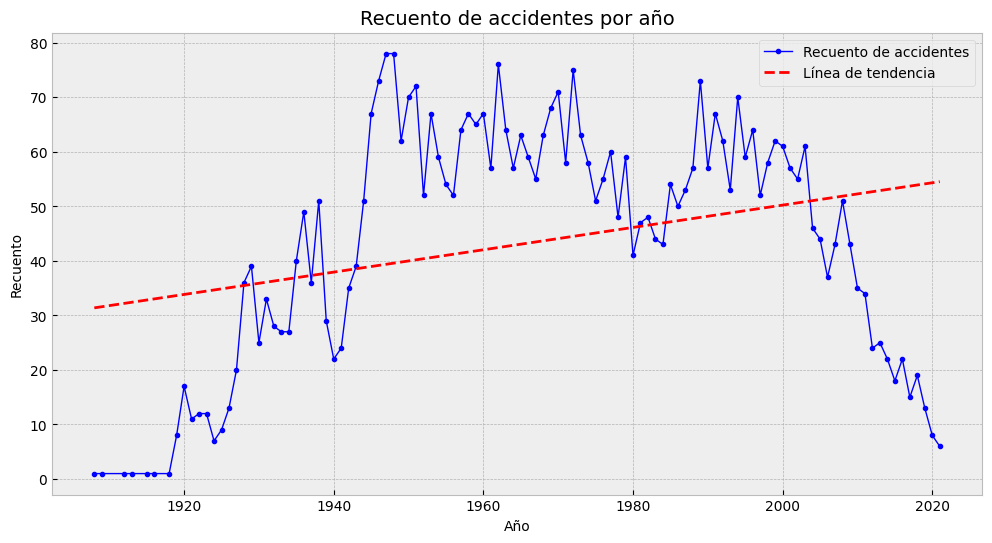

In [64]:
x = data.index
y = data['Count']
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Crea el gráfico con la línea de tendencia
plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.plot(x, y, color='blue', marker='.', linewidth=1, label='Recuento de accidentes')
plt.plot(x, trendline(x), color='red', linestyle='--', label='Línea de tendencia')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Recuento', fontsize=10)
plt.title('Recuento de accidentes por año', loc='center', fontsize=14)
plt.legend()
plt.show()

Accidentes por mes, semana y hora

In [32]:
data = df2.dropna(subset=['time'])
data = df2[df2['time'].str.strip() != ''] 
data = df2[df2['time'].str.strip() != ' '] 


In [33]:
data['time'] = pd.to_datetime(df2['time'], format='%H:%M', errors='coerce')

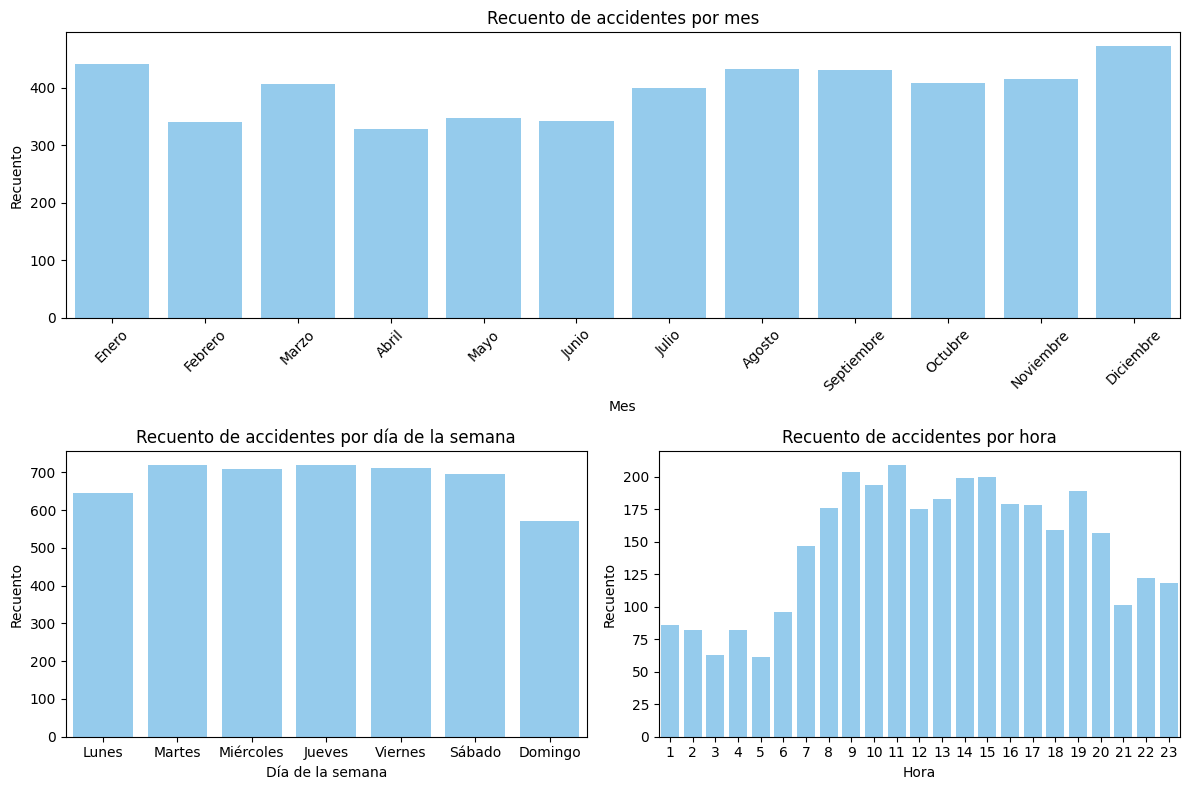

In [34]:
plt.figure(figsize=(12, 8))

# Gráfico 1: Recuento de accidentes por mes
plt.subplot(211)
sns.barplot(
    x=data.date.dt.month.value_counts().index,
    y=data.date.dt.month.value_counts().values,
    color='lightskyblue',
)
plt.xticks(
    ticks=range(0, 12),
    labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    rotation=45,
)
plt.xlabel('Mes')
plt.ylabel('Recuento')
plt.title('Recuento de accidentes por mes')

# Gráfico 2: Recuento de accidentes por día de la semana
plt.subplot(223)
sns.barplot(
    x=data.date.dt.weekday.value_counts().index,
    y=data.date.dt.weekday.value_counts().values,
    color='lightskyblue',
)
plt.xticks(
    ticks=range(7),
    labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
)
plt.xlabel('Día de la semana')
plt.ylabel('Recuento')
plt.title('Recuento de accidentes por día de la semana')

# Gráfico 3: Recuento de accidentes por hora
plt.subplot(224)
sns.barplot(
    
    x=data[data.time.dt.hour != 0].groupby(data.time.dt.hour)[['date']].count().index.astype(int),
    y=data[data.time.dt.hour != 0].groupby(data.time.dt.hour)[['date']].count()['date'],
    color='lightskyblue',
)
plt.xlabel('Hora')
plt.ylabel('Recuento')
plt.title('Recuento de accidentes por hora')

plt.tight_layout()
plt.show()



Tratamos de asignar un pais a cada incidente

In [35]:
paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [36]:

def asignar_pais(location):
    for pais in paises:
        if pais.lower() in location.lower():
            return pais
    return 'Other'


In [37]:
# Aplicamos la función 'obtener_pais' a la columna 'location' y creamos la columna 'country'
df2['country'] = df2['location'].apply(asignar_pais)

In [38]:
# Observamos que muchos de los valores corresponden a estados de los Estados Unidos

# Lista de estados de los Estados Unidos
estados = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

In [39]:
# Reemplazamos en  'country' el valor 'Other' por 'United States' si 'location' contiene un estado de los Estados Unidos
df2.loc[df2['location'].str.contains('|'.join(estados), case=False, na=False), 'country'] = 'United States'

Graficaos Paises con mas Accidentes

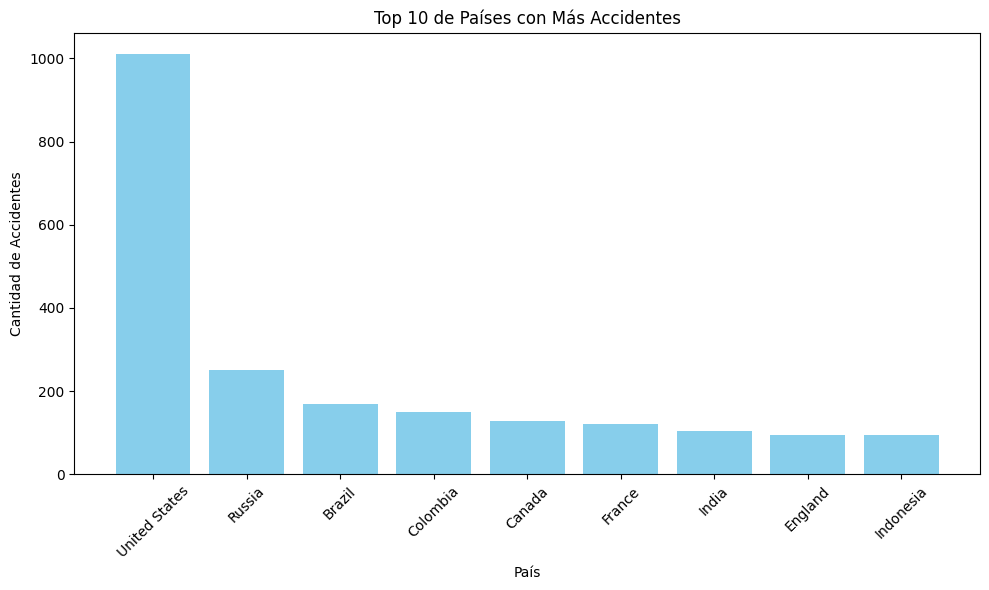

In [40]:
# Supongamos que tienes el resultado anterior almacenado en una variable llamada 'top_countries'
top_countries = df2.groupby('country')['date'].count().nlargest(10).loc[lambda x: x.index != 'Other']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries.values, color='skyblue')
plt.xlabel('País')
plt.ylabel('Cantidad de Accidentes')
plt.title('Top 10 de Países con Más Accidentes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Clasificamos los accidentes en Militar y civil, dado que en vuelos militares aparecen palabras repetidas

In [41]:
# Lista de palabras clave
keywords = ['Military', 'Force', 'Army']

# Función para categorizar los operadores
def categorize_operator(operator):
    for keyword in keywords:
        if keyword.lower() in operator.lower():
            return 'military'
    return 'civil'


In [42]:

# Aplicar la función a la columna 'operator' y crear la nueva columna 'category'
df2['category'] = df2['operator'].apply(categorize_operator)

Graficamos por catagoria: Militar - Civil

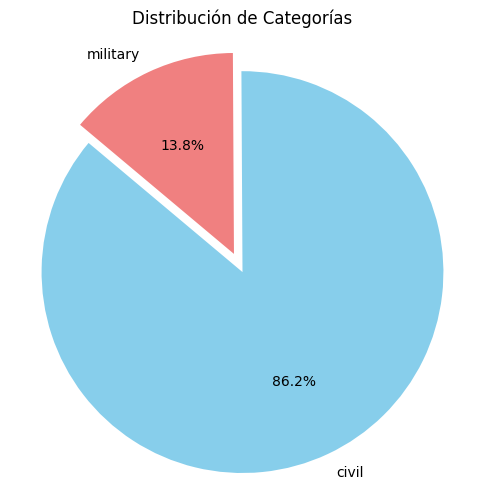

In [43]:
data = {'civil': df2.category.value_counts()[0], 'military': df2.category.value_counts()[1]}

# Etiquetas y valores para el gráfico de torta
labels = data.keys()
values = data.values()

# Colores para las categorías
colors = ['skyblue', 'lightcoral']

# Explode (para separar una porción del gráfico)
explode = (0, 0.1)  # Separamos la categoría "military" (índice 1) un poco

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribución de Categorías')
plt.axis('equal')  # Para que el gráfico sea circular

# Mostrar el gráfico
plt.show()

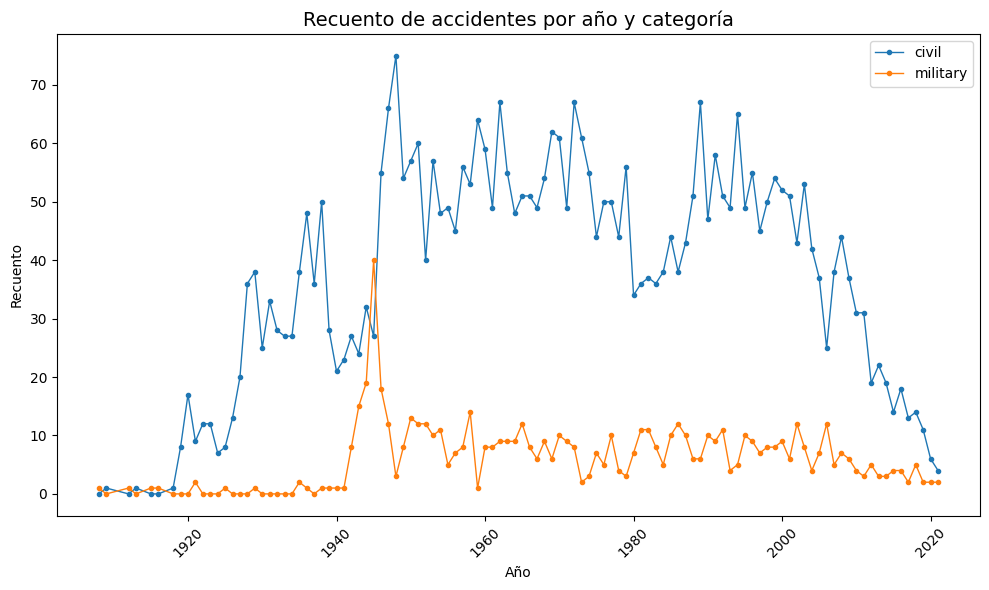

In [47]:
#Extraer el año de la columna 'date'
data = df2.copy()
data['year'] = data['date'].dt.year

# Agrupar por año y categoría y contar los registros
counts = data.groupby(['year', 'category']).size().unstack(fill_value=0)

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(10, 6))

for category in counts.columns:
    plt.plot(counts.index, counts[category], label=category, marker=".", linewidth=1)

# Personalizar el gráfico
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Recuento', fontsize=10)
plt.title('Recuento de accidentes por año y categoría', loc='Center', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
Muertes = data.groupby(data.date.dt.year)[['total_fatalities','all_aboard']].sum()
Muertes['Proportion'] = Muertes['total_fatalities'] / Muertes['all_aboard']

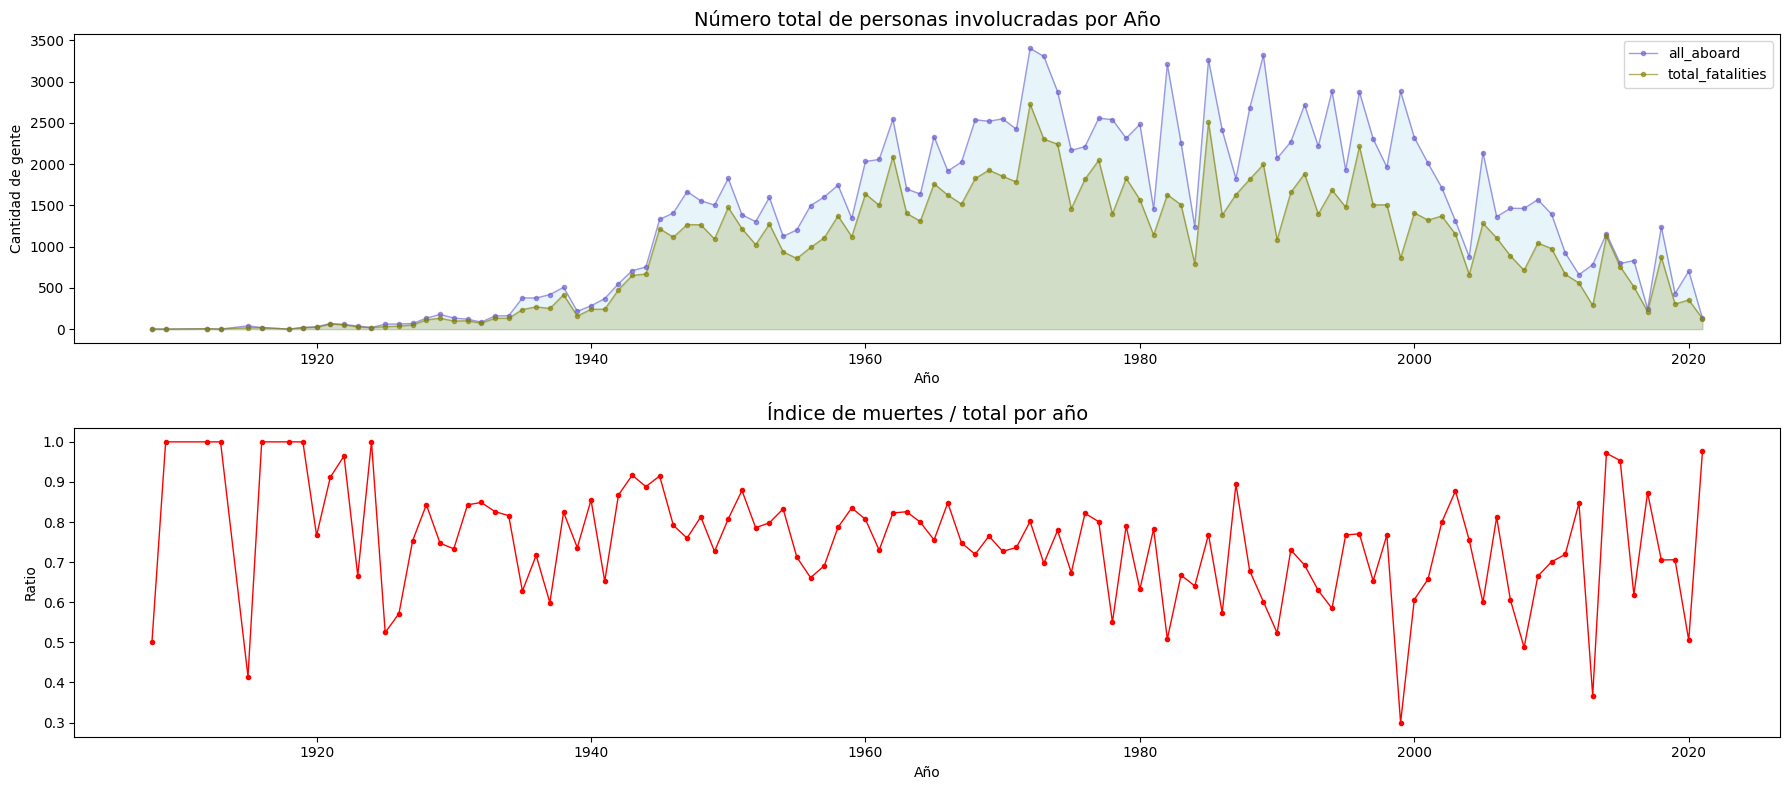

In [49]:
plt.figure(figsize=(18,8))
plt.subplot(2, 1, 1)
plt.fill_between(Muertes.index, 'all_aboard', data=Muertes, color="skyblue", alpha=0.2)
plt.plot(Muertes.index, 'all_aboard', data=Muertes, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Muertes.index, 'total_fatalities', data=Muertes, color="olive", alpha=0.2)
plt.plot(Muertes.index, 'total_fatalities', data=Muertes, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad de gente', fontsize=10)
plt.title('Número total de personas involucradas por Año', loc='Center', fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(Muertes.index, 'Proportion', data=Muertes, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Índice de muertes / total por año', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

Grafica incidentes por tipo de aeronave

<Axes: ylabel='ac_type'>

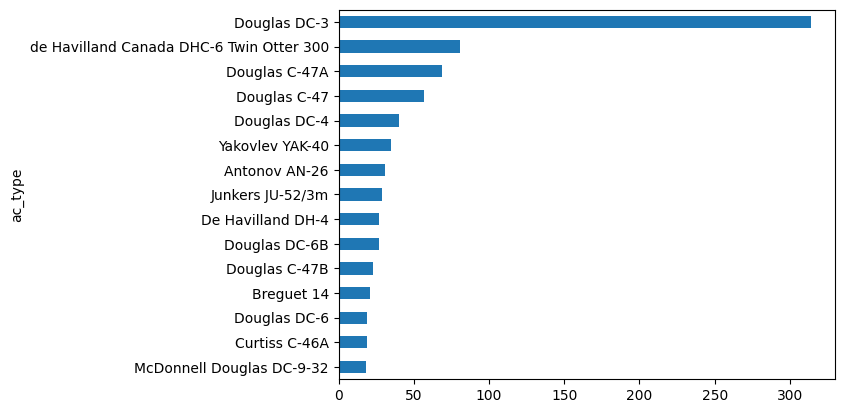

In [50]:
data['ac_type'].value_counts().head(15).sort_values().plot.barh()

Grafica de accidentes por operador

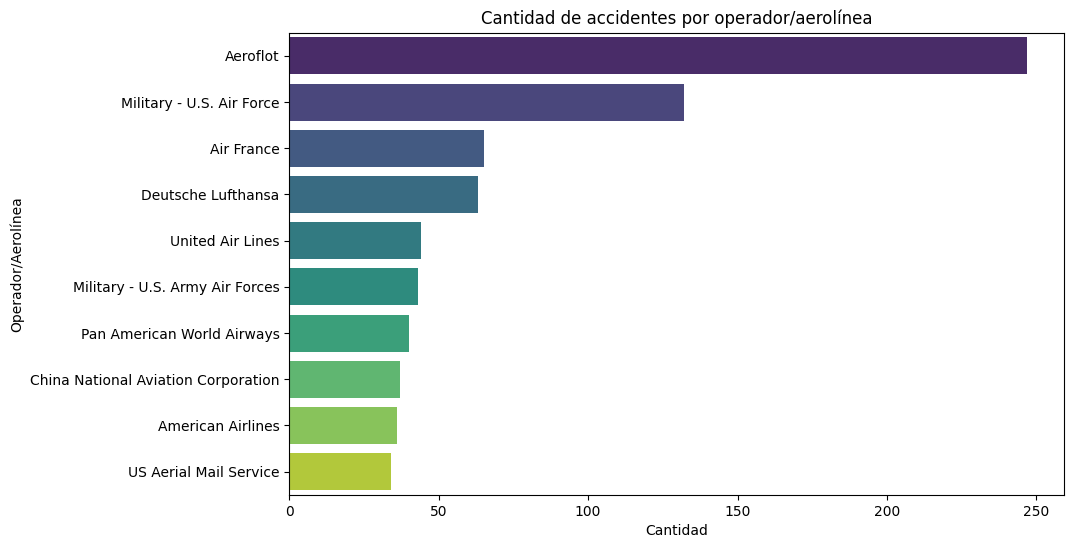

In [65]:
# Calculamos el recuento de accidentes por operador de aerolíneas (tomamos las 15 más representativos)
operator_counts = df2['operator'].value_counts().head(10)

# Creamos un DataFrame con los datos de recuento
top_operators = pd.DataFrame({'Operator': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Operator', data=top_operators, palette='viridis')
plt.title('Cantidad de accidentes por operador/aerolínea')
plt.xlabel('Cantidad')
plt.ylabel('Operador/Aerolínea')
plt.show()

Accidentes por Decada

In [52]:
df2['Decada'] = (df2.date.dt.year) // 10 * 10

<Axes: ylabel='Decada'>

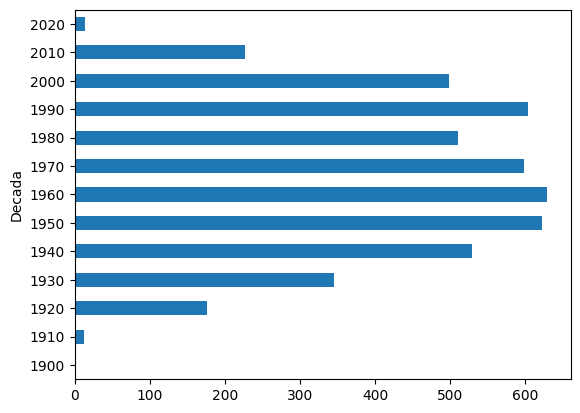

In [53]:
df2['Decada'].value_counts().head(15).sort_index().plot.barh()

Outliers

Text(0.5, 1.0, 'Distribución de All Aboard y Total Fatalities')

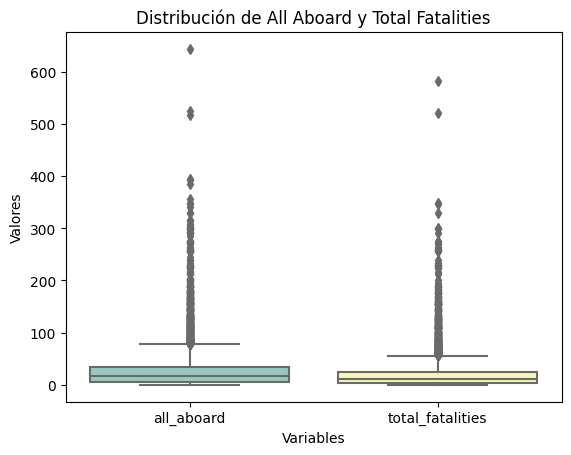

In [54]:
# Graficamos las siguientes variables que podemos utilizar (ya que no tienen valores nulos)
sns.boxplot(data=df2[['all_aboard', 'total_fatalities']], palette='Set3')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Distribución de All Aboard y Total Fatalities')


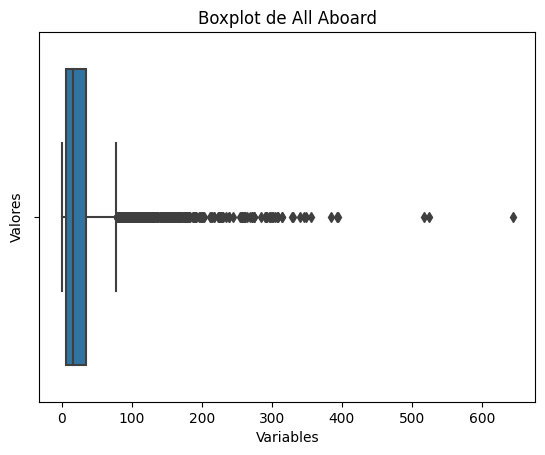

El rango intercuartil (IQR) de all_aboard es: 29.0
Límites inferior y superior:  -37.5 78.5


In [55]:
# Filtramos outliers de total_aboard
sns.boxplot(data=df2, x='all_aboard')
plt.title('Boxplot de All Aboard')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

# IQR
Q1 = np.percentile(df2['all_aboard'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(df2['all_aboard'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de all_aboard es: {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print("Límites inferior y superior: ",lower_lim, upper_lim)

In [56]:
df2[(df2['all_aboard']<lower_lim) | (df2['all_aboard']>upper_lim)]

,date,time,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,summary,country,category,Decada
334,1935-02-12,,"Off Point Sur, Californiia",Military - US Navy,Others,Goodyear-Zeppelin U.S.S. Macon (airship),ZRS-4,83,0,83,2,0,2,The airship suffered structural failure in a s...,Other,military,1930
429,1937-05-06,19:25,"Lakehurst, New Jersey",Deutsche Zeppelin Reederei,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,D-LZ-129,97,36,61,35,13,22,The airship Hindenburg caught fire and burned ...,United States,civil,1930
1029,1949-06-07,00:25,"San Juan, Puerto Rico",Strato Freight,San Juan - Miami,Curtiss C-46D-5-CU,N92857,81,75,6,53,52,1,The aircraft crashed into the Atlantic Ocean d...,Puerto Rico,civil,1940
1074,1950-03-12,14:50,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,Llandow - Dublin,Avro 689 Tudor 5,G-AKBY,83,78,5,80,75,5,During the approach to Runway 28 at Llandow Ai...,Other,civil,1950
1255,1952-12-20,06:30,"Moses Lake, Washington",Military - U.S. Air Force,Others,Douglas C-124A Globemaster,50-100,115,105,10,87,82,5,Within two minutes after takeoff the aircraft ...,United States,military,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752,2019-12-27,07:22,"Almaty, Kazakhstan",Bek Air,Almaty - Nursultan Nazabavev,Fokker 100,UP-F100,98,95,3,12,11,1,"While taking off, the tail of the plane struck...",Kazakhstan,civil,2010
4754,2020-01-08,06:18,"Near Shahriah, Iran",Ukraine International Airlines,Tehran - Kiev,Boeing 737-8KV WL,UR-PSR,176,167,9,176,167,9,The plane took off from Tehran International A...,Iran,civil,2020
4755,2020-02-05,18:19,"Istanbul, Turkey",Pegasus Airlines,Izmir - Istanbul,Boeing 737-86J,TC-IZK,177,171,6,3,3,0,While landing duriing high winds and heavey ra...,Turkey,civil,2020
4757,2020-05-22,14:40,"Karachi, Pakistan",Pakistan International Airline,Lahore - Karachi,Airbus A320-214,AP-BLD,99,91,8,97,89,8,"While landing, the aircraft scraped the runway...",Pakistan,civil,2020


In [57]:
# Son muchos registros por lo que analizamos la conveniencia de filtrar vuelos de más de 500 personas
df2[(df2['all_aboard']>400)]

,date,time,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,summary,country,category,Decada
2759,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,644,614,30,583,560,23,Both aircraft were diverted to Tenerife becaus...,Other,civil,1970
3169,1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,Tokyo - Osaka,Boeing B-747-SR46,JA8119,524,509,15,520,505,15,The aircraft suffered an aft pressure bulkhead...,Japan,civil,1980
3999,1999-07-23,11:25,"Tokyo, Japan",All Nippon Airways,"Tokyo, Japan - Chitose, Japan",Boeing B-747,JA8966,517,503,14,1,0,1,Two minutes after taking off from Haneda Airpo...,Japan,civil,1990


In [ ]:
# Observamos que se trata de datos correctos. El primer vuelo de la lista fue un choque entre 2 aviones y por ello la cantidad de personas (están sumados los 2 vuelos de la colisión)
# El segundo y tercer registro son correctos también

In [62]:
df2.shape

(4767, 17)

Incidentes: El primero  y el ultimo que tenemos registro

In [72]:
# Obtenemos el vuelo más antiguo
vuelo_mas_antiguo = df2[df2['date'] == df2['date'].min()]
operador_antiguo = vuelo_mas_antiguo['operator'].values[0]
fecha_antigua = vuelo_mas_antiguo['date'].values[0]

# Obtenemos el vuelo más reciente
vuelo_mas_reciente = df2[df2['date'] == df2['date'].max()]
operador_reciente = vuelo_mas_reciente['operator'].values[0]
fecha_reciente = vuelo_mas_reciente['date'].values[0]

# Imprimimos los resultados
print("Vuelo más antiguo:")
print("Operador de la aerolínea:", operador_antiguo)
print("Fecha:", str(fecha_antigua)[:10])
print()
print("Vuelo más reciente:")
print("Operador de la aerolínea:", operador_reciente)
print("Fecha:", str(fecha_reciente)[:10])

Vuelo más antiguo:
Operador de la aerolínea: Military - U.S. Army
Fecha: 1908-09-17

Vuelo más reciente:
Operador de la aerolínea: Kamchatka Aviation Enterprise
Fecha: 2021-07-06


In [ ]:
df2['year'] = df2.date.dt.year
df2.to_csv('../data/accidentes_limpio.csv', index=False)

6) KPI's
a) Tasa de mortalidad.
   Objetivo: reducir en un 10% la tasa de esta decada con respecto a la anterior

In [142]:
# Filtramos los datos para obtener los accidentes en las décadas específicas
decade_2000s = df2[(df2['year'] > 2001) & (df2['year'] <= 2011)]
decade_2010s = df2[(df2['year'] > 2011) & (df2['year'] <= 2021)]

# Calcula la tasa de fatalidad de la tripulación para ambas décadas
fatality_rate_2000s = round(((decade_2000s['crew_fatalities'].sum() / decade_2000s.shape[0]) * 100),4)
fatality_rate_2010s = round(((decade_2010s['crew_fatalities'].sum() / decade_2010s.shape[0]) * 100),4)

# Compara las tasas de fatalidad y calcula la disminución
disminucion_fatality_rate = round((fatality_rate_2000s - fatality_rate_2010s)/fatality_rate_2000s,4)
kpi = round(fatality_rate_2000s * 0.9,4)
# Imprime los resultados
print("Tasa de Fatalidad de la Tripulación en los 2000-2010:", fatality_rate_2000s)
print("Tasa de Fatalidad de la Tripulación en los 2010-2020:", fatality_rate_2010s)
print("Disminución de la Tasa de Fatalidad de la Tripulación:", disminucion_fatality_rate, "%")
print("Objetivo(kpi) Tasa menor a :", kpi)

Tasa de Fatalidad de la Tripulación en los 2000-2010: 326.9488
Tasa de Fatalidad de la Tripulación en los 2010-2020: 386.0465
Disminución de la Tasa de Fatalidad de la Tripulación: -0.1808 %
Objetivo(kpi) Tasa menor a : 294.2539


Esto indica que la tasa de fatalidad de la tripulación en la década de 2010-2020 es un 0.1808 % más alta que en la década de 2000-2010, lo que significa que hubo un aumento en la tasa de fatalidad de la tripulación en la última década en comparación con la década anterior. Esta es una información importante para evaluar la seguridad en la industria de la aviación y podría requerir una revisión adicional de las prácticas de seguridad y protocolos para la tripulación.